In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Generate synthetic data

In [ ]:

data = np.random.normal(0, 1, (1000, 20))  # Normal data
anomalies = np.random.normal(0, 5, (50, 20))  # Anomalous data

# Combine normal and anomalous data


In [ ]:
dataset = np.concatenate([data, anomalies], axis=0)
labels = np.concatenate([np.zeros(1000), np.ones(50)], axis=0)  # 0 for normal, 1 for anomaly


# Split the dataset into training and testing sets"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2, random_state=42)


# Standardize the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the size of the input

In [ ]:
input_dim = X_train.shape[1]
encoding_dim = 10  # Latent space dimension

# Encoder


In [ ]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)


# Decoder


In [ ]:
decoded = Dense(input_dim, activation='sigmoid')(encoded)


# Autoencoder model


In [ ]:
autoencoder = Model(inputs=input_layer, outputs=decoded)



# Compile the autoencoder model


In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')


# Train the autoencoder


In [ ]:
history = autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_test, X_test),
                shuffle=True)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.2263 - val_loss: 1.5111
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2493 - val_loss: 1.4833
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2865 - val_loss: 1.4576
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2200 - val_loss: 1.4338
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1616 - val_loss: 1.4110
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2090 - val_loss: 1.3888
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0725 - val_loss: 1.3681
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9909 - val_loss: 1.3483
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1645 - val_loss: 1.3301
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0626 - val_loss: 1.3136
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0180 - val_loss: 1.2988
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9519 - val_l

# Predict the reconstructed data after training


In [ ]:
X_test_pred = autoencoder.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


# Calculate the reconstruction error


In [ ]:
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)


# Define a threshold for anomaly detection

In [ ]:
threshold = np.percentile(mse, 95)  # Choose a threshold based on 95th percentile


# Identify anomalies


In [ ]:
anomalies = mse > threshold


# Print results


In [ ]:
print(f"Detected {np.sum(anomalies)} anomalies out of {len(X_test)} samples.")


Detected 11 anomalies out of 210 samples.


# Plot the training and validation loss

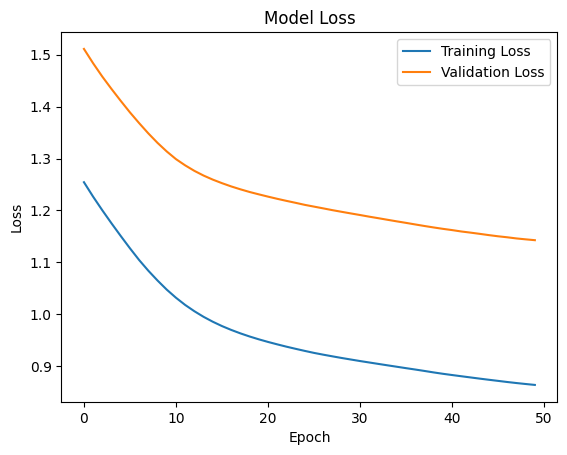

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()